# Exploring hydrologic signatures of precipitation and daily runoff data

**Author:** Javed Ali

**Date:** Sept. 7, 2021

- Climate: the precipitation data from a weather station within or near Oviedo
- Streamflow: the daily runoff data for Little Econlockhatchee River

## Import libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly 
from plotly import graph_objects as go
import plotly.express as px
import plotly.io as pio
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)

# system
import os
import glob

# hide warnings
import warnings
warnings.filterwarnings('ignore')

## Load and check the data

In [68]:
# precipitation data
precip_df = pd.read_csv("precipitation_oviedo.csv", parse_dates=True, index_col='DATE')

# streamflow data
runoff_df = pd.read_excel("streamflow little econlockhatchee river.xlsx", parse_dates=True, 
                          index_col='datetime')

In [60]:
precip_cdf = pd.read_excel("precipitation_2.xlsx")
precip_cdf.head()

,RAINFALL (mm),Rank,CDF
0,0.0,1,0.000167
1,0.0,2,0.000334
2,0.0,3,0.000501
3,0.0,4,0.000668
4,0.0,5,0.000835


In [98]:
runoff_fdc = pd.read_excel("streamflow_fdc.xlsx")
runoff_fdc.head()

,discharge (cfs),Rank,F,Exceedance prob
0,11.0,1,0.000110,0.999890
1,14.0,2,0.000220,0.999780
2,14.0,3,0.000330,0.999670
3,15.0,4,0.000439,0.999561
4,15.2,5,0.000549,0.999451


In [22]:
precip_df.head()

,STATION NUMBER,TYPE,SOURCE VARIABLE,OUTPUT VARIABLE,TIME,RAINFALL (in),SOURCE
DATE,,,,,,,
1985-01-02,640275,Daily Total,11.16,11,0:00:00,0.00,03A
1985-01-03,640275,Daily Total,11.16,11,0:00:00,0.15,03A
1985-01-04,640275,Daily Total,11.16,11,0:00:00,0.00,03A
1985-01-05,640275,Daily Total,11.16,11,0:00:00,0.00,03A
1985-01-06,640275,Daily Total,11.16,11,0:00:00,0.00,03A


In [69]:
runoff_df.head()

,agency_cd,site_no,discharge (cfs),discharge_cd,discharge (mm/day),year,month,day,month.1,year.1,annual runoff (mm/day),annual average runoff (mm/day)
datetime,,,,,,,,,,,,
1996-10-01,USGS,2233475,148.0,A,1.923053,1996,10,1,1.0,1996.0,119.424178,1.298089
1996-10-02,USGS,2233475,122.0,A,1.585219,1996,10,2,2.0,1997.0,720.170280,1.973069
1996-10-03,USGS,2233475,105.0,A,1.364328,1996,10,3,3.0,1998.0,775.224163,2.123902
1996-10-04,USGS,2233475,112.0,A,1.455283,1996,10,4,4.0,1999.0,715.167744,1.959364
1996-10-05,USGS,2233475,170.0,A,2.208912,1996,10,5,5.0,2000.0,275.295403,0.752173


In [13]:
precip_df.describe()

,STATION NUMBER,SOURCE VARIABLE,OUTPUT VARIABLE,RAINFALL (in)
count,5985.0,5985.000000,5985.0,5985.000000
mean,640275.0,11.119940,11.0,0.128077
std,0.0,0.028265,0.0,0.362619
min,640275.0,11.100000,11.0,0.000000
25%,640275.0,11.100000,11.0,0.000000
50%,640275.0,11.100000,11.0,0.000000
75%,640275.0,11.160000,11.0,0.030000
max,640275.0,11.160000,11.0,4.150000


In [14]:
print("Beginning date of precipitation data: ", precip_df.DATE.min())
print("Last date of precipitation data: ", precip_df.DATE.max())

Beginning date of precipitation data:  1/1/1986
Last date of precipitation data:  9/9/2001


In [23]:
# change the rainfall from inches to mm
precip_df["RAINFALL (mm)"] = precip_df['RAINFALL (in)'] * 25.4

In [24]:
precip_df.head()

,STATION NUMBER,TYPE,SOURCE VARIABLE,OUTPUT VARIABLE,TIME,RAINFALL (in),SOURCE,RAINFALL (mm)
DATE,,,,,,,,
1985-01-02,640275,Daily Total,11.16,11,0:00:00,0.00,03A,0.00
1985-01-03,640275,Daily Total,11.16,11,0:00:00,0.15,03A,3.81
1985-01-04,640275,Daily Total,11.16,11,0:00:00,0.00,03A,0.00
1985-01-05,640275,Daily Total,11.16,11,0:00:00,0.00,03A,0.00
1985-01-06,640275,Daily Total,11.16,11,0:00:00,0.00,03A,0.00


## Annual precipitation (mm/year) for each year

In [31]:
# annual precipitation (mm/year) for each year
precip_df_annual = precip_df.resample('A').sum()

In [32]:
precip_df_annual

,STATION NUMBER,SOURCE VARIABLE,OUTPUT VARIABLE,RAINFALL (in),RAINFALL (mm)
DATE,,,,,
1985-12-31,233060100,4062.24,4004,51.89,1318.006
1986-12-31,233700375,4073.40,4015,39.86,1012.444
1987-12-31,233700375,4073.40,4015,44.96,1141.984
1988-12-31,204888000,3571.20,3520,41.60,1056.640
1989-12-31,233700375,4073.40,4015,36.84,935.736
1990-12-31,165190950,2876.40,2838,24.79,629.666
1991-12-31,233700375,4051.50,4015,70.28,1785.112
1992-12-31,227937900,3951.60,3916,32.50,825.500
1993-12-31,233700375,4051.50,4015,47.02,1194.308


In [33]:
precip_df_annual.describe()

,STATION NUMBER,SOURCE VARIABLE,OUTPUT VARIABLE,RAINFALL (in),RAINFALL (mm)
count,1.700000e+01,17.000000,17.000000,17.000000,17.000000
mean,2.254145e+08,3914.872941,3872.647059,45.090588,1145.300941
std,1.842873e+07,318.142730,316.607790,12.516391,317.916344
min,1.651910e+08,2876.400000,2838.000000,24.790000,629.666000
25%,2.298587e+08,3984.900000,3949.000000,36.840000,935.736000
50%,2.337004e+08,4051.500000,4015.000000,44.180000,1122.172000
75%,2.337004e+08,4062.240000,4015.000000,51.890000,1318.006000
max,2.343406e+08,4073.400000,4026.000000,70.280000,1785.112000


## Mean monthly precipitation (mm/month)

In [41]:
# mean monthly precipitation (mm/month)
precip_df_monthly = precip_df.resample('M').mean()
precip_df_monthly

,STATION NUMBER,SOURCE VARIABLE,OUTPUT VARIABLE,RAINFALL (in),RAINFALL (mm)
DATE,,,,,
1985-01-31,640275.0,11.16,11.0,0.008667,0.220133
1985-02-28,640275.0,11.16,11.0,0.027857,0.707571
1985-03-31,640275.0,11.16,11.0,0.045161,1.147097
1985-04-30,640275.0,11.16,11.0,0.055667,1.413933
1985-05-31,640275.0,11.16,11.0,0.097742,2.482645
...,...,...,...,...,...
2001-07-31,640275.0,11.10,11.0,0.246129,6.251677
2001-08-31,640275.0,11.10,11.0,0.159032,4.039419
2001-09-30,640275.0,11.10,11.0,0.150000,3.810000


In [49]:
# number of days with zero precipitation
precip_df[precip_df['RAINFALL (mm)']==0].count()

STATION NUMBER     3832
TYPE               3832
SOURCE VARIABLE    3832
OUTPUT VARIABLE    3832
TIME               3832
RAINFALL (in)      3832
SOURCE             3832
RAINFALL (mm)      3832
dtype: int64

## Annual runoff (mm/year) for each year

In [70]:
# annual runoff (mm/year) for each year
runoff_df_annual = runoff_df.resample('A').sum()

In [71]:
runoff_df_annual

,site_no,discharge (cfs),discharge (mm/day),year,month,day,month.1,year.1,annual runoff (mm/day),annual average runoff (mm/day)
datetime,,,,,,,,,,
1996-12-31,205479700,9191.0,119.424178,183632,1012,1457,78.0,52221.0,15469.038023,43.714693
1997-12-31,815218375,55425.0,720.170280,728905,2382,5738,0.0,0.0,0.000000,0.000000
1998-12-31,815218375,59662.0,775.224163,729270,2382,5738,0.0,0.0,0.000000,0.000000
1999-12-31,815218375,55040.0,715.167744,729635,2382,5738,0.0,0.0,0.000000,0.000000
2000-12-31,817451850,21187.0,275.295403,732000,2384,5767,0.0,0.0,0.000000,0.000000
2001-12-31,815218375,43854.9,569.833029,730365,2382,5738,0.0,0.0,0.000000,0.000000
2002-12-31,815218375,59257.1,769.963055,730730,2382,5738,0.0,0.0,0.000000,0.000000
2003-12-31,815218375,64124.9,833.213301,731095,2382,5738,0.0,0.0,0.000000,0.000000
2004-12-31,817451850,67306.5,874.553738,733464,2384,5767,0.0,0.0,0.000000,0.000000


In [76]:
runoff_df_annual.describe()

,site_no,discharge (cfs),discharge (mm/day),year,month,day,month.1,year.1,annual runoff (mm/day),annual average runoff (mm/day)
count,2.600000e+01,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,7.818881e+08,45788.926923,594.963001,703202.923077,2280.807692,5506.153846,3.000000,2008.500000,594.963001,1.681334
std,1.289904e+08,14970.955735,194.526610,116009.442436,359.511671,908.288046,15.297059,10241.380693,3033.727951,8.573157
min,2.054797e+08,9191.000000,119.424178,183632.000000,1012.000000,1457.000000,0.000000,0.000000,0.000000,0.000000
25%,8.152184e+08,36022.850000,468.066504,730821.250000,2382.000000,5738.000000,0.000000,0.000000,0.000000,0.000000
50%,8.152184e+08,50002.850000,649.717032,733374.500000,2382.000000,5738.000000,0.000000,0.000000,0.000000,0.000000
75%,8.152184e+08,55328.750000,718.919646,735383.750000,2382.000000,5738.000000,0.000000,0.000000,0.000000,0.000000
max,8.174518e+08,67306.500000,874.553738,739320.000000,2384.000000,5767.000000,78.000000,52221.000000,15469.038023,43.714693


In [78]:
print(runoff_df.index.min())
print(runoff_df.index.max())

1996-10-01 00:00:00
2021-09-01 00:00:00


## Mean monthly runoff (mm/month)

In [91]:
runoff_df_monthly = runoff_df.resample('M').sum()
runoff_df_monthly

,site_no,discharge (cfs),discharge (mm/day),year,month,day,month.1,year.1,annual runoff (mm/day),annual average runoff (mm/day)
datetime,,,,,,,,,,
1996-10-31,69237725,5423.0,70.464293,61876,310,496,78.0,52221.0,15469.038023,43.714693
1996-11-30,67004250,1818.0,23.622365,59880,330,465,0.0,0.0,0.000000,0.000000
1996-12-31,69237725,1950.0,25.337520,61876,372,496,0.0,0.0,0.000000,0.000000
1997-01-31,69237725,1564.0,20.321990,61907,31,496,0.0,0.0,0.000000,0.000000
1997-02-28,62537300,1510.0,19.620336,55916,56,406,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
2021-05-31,69237725,1318.8,17.135960,62651,155,496,0.0,0.0,0.000000,0.000000
2021-06-30,67004250,2474.2,32.148765,60630,180,465,0.0,0.0,0.000000,0.000000
2021-07-31,69237725,6758.0,87.810749,62651,217,496,0.0,0.0,0.000000,0.000000


In [89]:
runoff_df.head()

,agency_cd,site_no,discharge (cfs),discharge_cd,discharge (mm/day),year,month,day,month.1,year.1,annual runoff (mm/day),annual average runoff (mm/day)
datetime,,,,,,,,,,,,
1996-10-01,USGS,2233475,148.0,A,1.923053,1996,10,1,1.0,1996.0,119.424178,1.298089
1996-10-02,USGS,2233475,122.0,A,1.585219,1996,10,2,2.0,1997.0,720.170280,1.973069
1996-10-03,USGS,2233475,105.0,A,1.364328,1996,10,3,3.0,1998.0,775.224163,2.123902
1996-10-04,USGS,2233475,112.0,A,1.455283,1996,10,4,4.0,1999.0,715.167744,1.959364
1996-10-05,USGS,2233475,170.0,A,2.208912,1996,10,5,5.0,2000.0,275.295403,0.752173


## Visualization

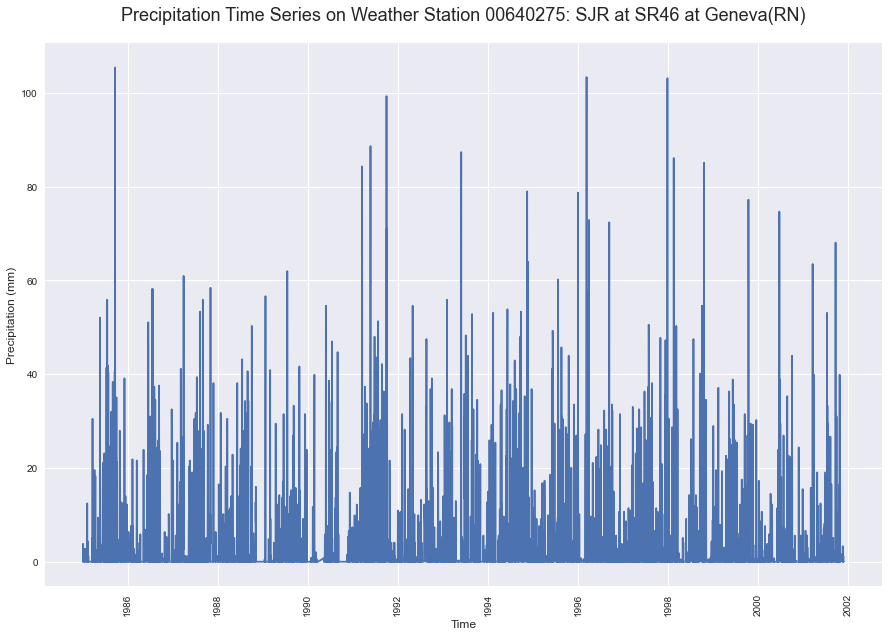

In [26]:
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(precip_df.index.values, precip_df['RAINFALL (mm)'])
plt.xlabel("Time", fontsize=12)
plt.ylabel("Precipitation (mm)", fontsize=12)
plt.title("Precipitation Time Series on Weather Station 00640275: SJR at SR46 at Geneva(RN)", 
          fontsize=18, y=1.03)
plt.xticks(rotation=90)
plt.savefig("Precipitation Time Series", dpi=300)
    
plt.show()    

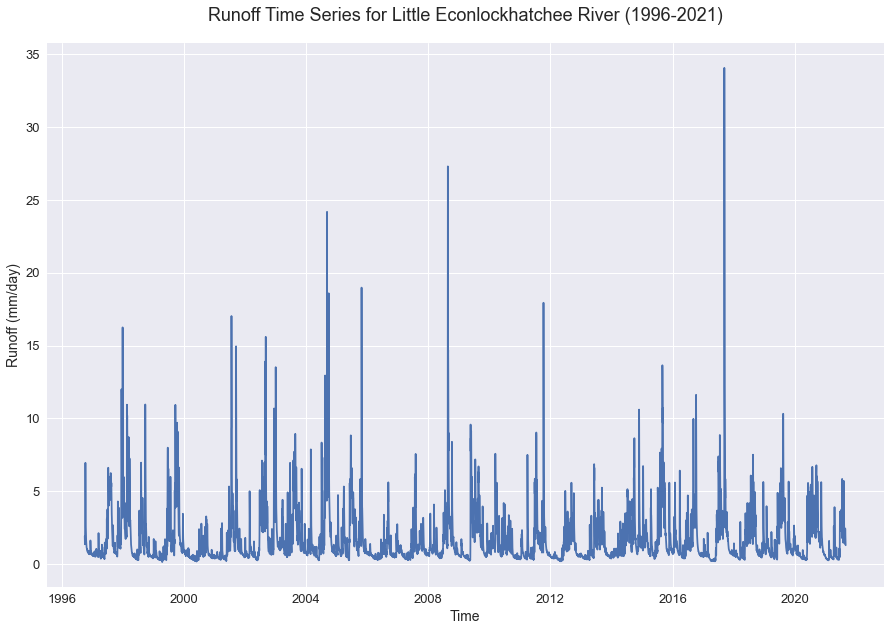

In [79]:
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(runoff_df.index.values, runoff_df['discharge (mm/day)'])
plt.xlabel("Time", fontsize=14)
plt.ylabel("Runoff (mm/day)", fontsize=14)
plt.title("Runoff Time Series for Little Econlockhatchee River (1996-2021)", 
          fontsize=18, y=1.03)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("Runoff Time Series", dpi=300)
    
plt.show()    

### Plot annual precipitation time series

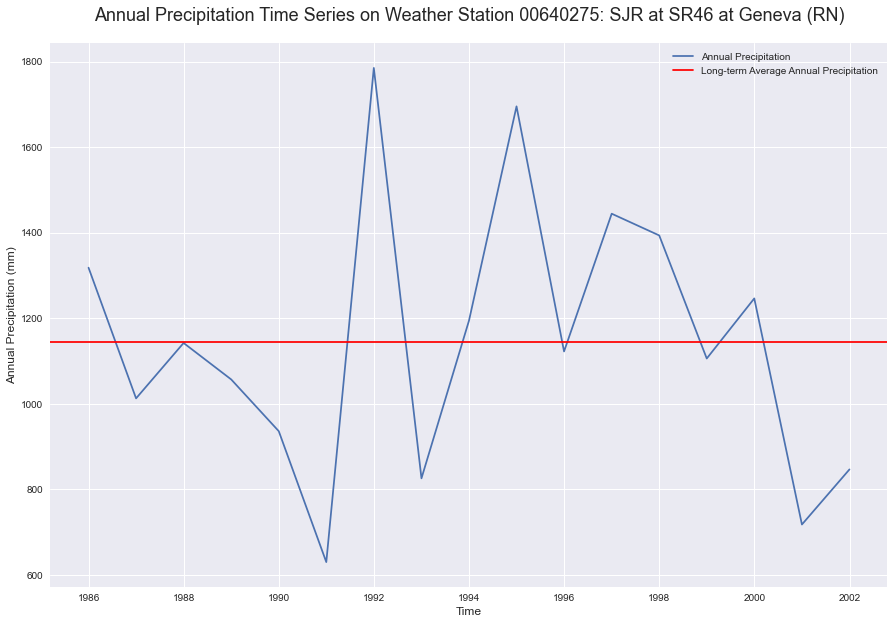

In [40]:
# plot the annual precipitation time series
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(precip_df_annual.index.values, precip_df_annual['RAINFALL (mm)'], label="Annual Precipitation")
plt.axhline(y=1145.3, label='Long-term Average Annual Precipitation', color='r')
plt.xlabel("Time", fontsize=12)
plt.ylabel("Annual Precipitation (mm)", fontsize=12)
plt.title("Annual Precipitation Time Series on Weather Station 00640275: SJR at SR46 at Geneva (RN)", 
          fontsize=18, y=1.03)
# plt.xticks(rotation=90)
plt.legend()
plt.savefig("Annual Precipitation Time Series", dpi=300)
    
plt.show()    

### Plot monthly precipitation time series and seasonality

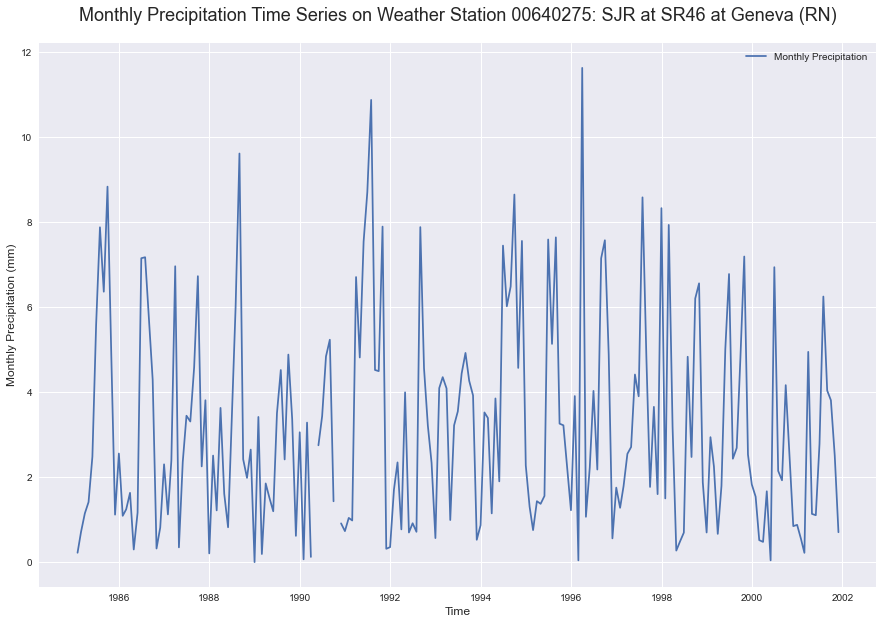

In [42]:
# plot the monthly precipitation time series
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(precip_df_monthly.index.values, precip_df_monthly['RAINFALL (mm)'], label="Monthly Precipitation")

plt.xlabel("Time", fontsize=12)
plt.ylabel("Monthly Precipitation (mm)", fontsize=12)
plt.title("Monthly Precipitation Time Series on Weather Station 00640275: SJR at SR46 at Geneva (RN)", 
          fontsize=18, y=1.03)
# plt.xticks(rotation=90)
plt.legend()
plt.savefig("Monthly Precipitation Time Series", dpi=300)
    
plt.show()    

In [43]:

Precipitation = [57.9867, 55.5961, 96.5051, 50.9195, 69.6707, 139.6253, 159.3327, 156.8076, 143.4204,
                     114.6287, 50.8448, 49.9633]

Month = "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" 

precip_monthly_avg = pd.DataFrame({"Precipitation (mm)": Precipitation, "Months": Month})

In [44]:
precip_monthly_avg

,Precipitation (mm),Months
0,57.9867,Jan
1,55.5961,Feb
2,96.5051,Mar
3,50.9195,Apr
4,69.6707,May
5,139.6253,Jun
6,159.3327,Jul
7,156.8076,Aug
8,143.4204,Sep
9,114.6287,Oct


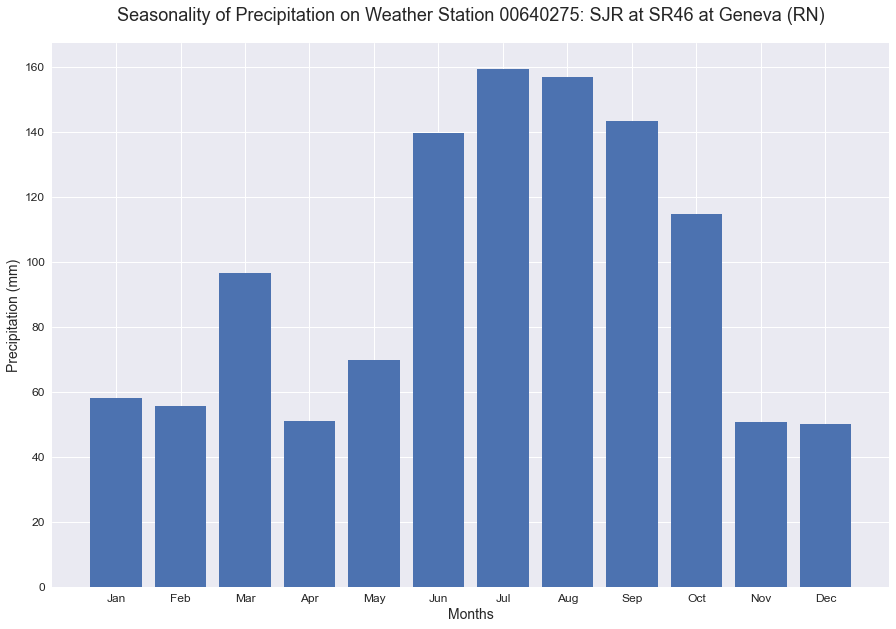

In [48]:
# plot the monthly precipitation time series
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.bar(precip_monthly_avg.Months, precip_monthly_avg['Precipitation (mm)'])

plt.xlabel("Months", fontsize=14)
plt.ylabel("Precipitation (mm)", fontsize=14)
plt.title("Seasonality of Precipitation on Weather Station 00640275: SJR at SR46 at Geneva (RN)", 
          fontsize=18, y=1.03)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.legend()
plt.savefig("Seasonality Precipitation Time Series", dpi=300)
    
plt.show()    

### Plot CDF (cumulative distribution function) for non-zero daily precipitation

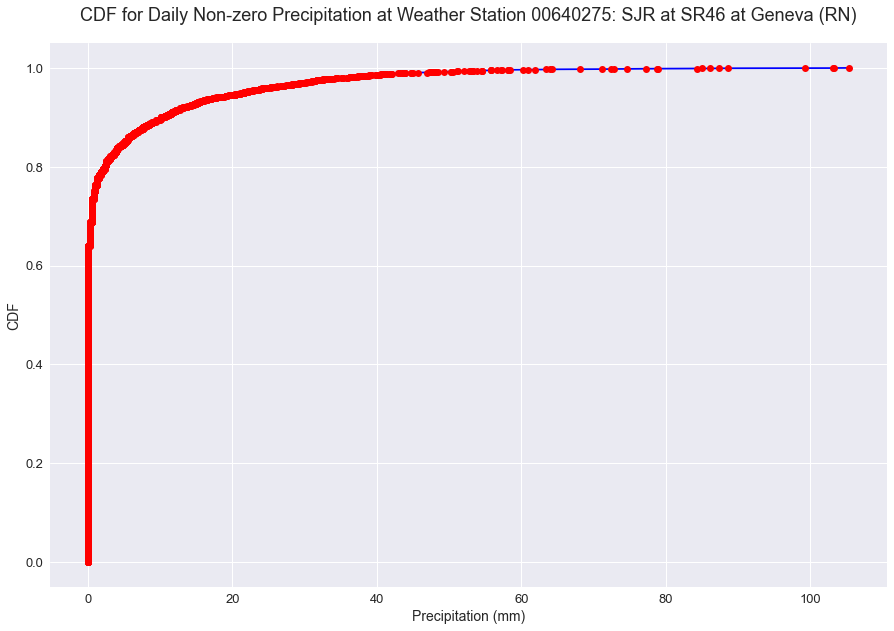

In [66]:
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(precip_cdf['RAINFALL (mm)'], precip_cdf.CDF, "o-", color='b', markerfacecolor='r')
plt.xlabel("Precipitation (mm)", fontsize=14)
plt.ylabel("CDF", fontsize=14)
plt.title("CDF for Daily Non-zero Precipitation at Weather Station 00640275: SJR at SR46 at Geneva (RN)", 
          fontsize=18, y=1.03)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.savefig("CDF", dpi=300)
    
plt.show()    

### Plot Annual and Average Annual Runoff 

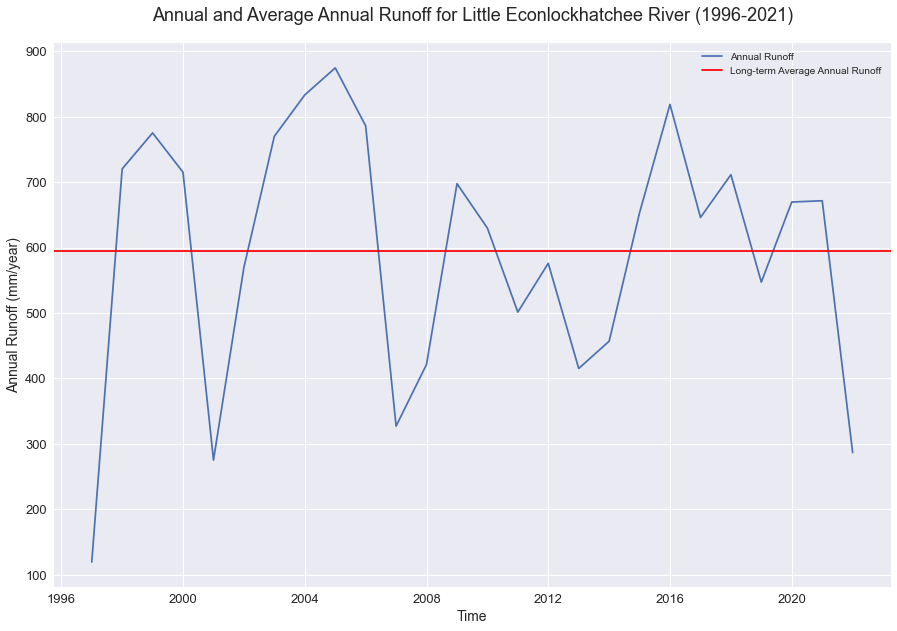

In [84]:
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(runoff_df_annual.index.values, runoff_df_annual['discharge (mm/day)'], label="Annual Runoff")
plt.axhline(y=594.963, label='Long-term Average Annual Runoff', color='r')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Annual Runoff (mm/year)", fontsize=14)
plt.title("Annual and Average Annual Runoff for Little Econlockhatchee River (1996-2021)", 
          fontsize=18, y=1.03)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend()
plt.savefig("Annual Runoff Time Series", dpi=300)
    
plt.show()    

### Plot monthly runoff time series

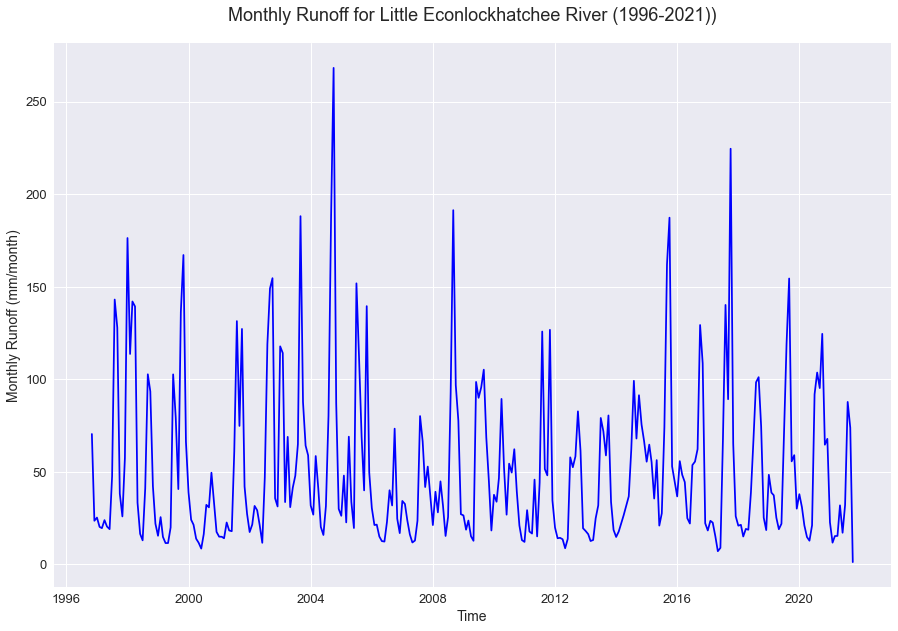

In [92]:
# plot the monthly runoff time series
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(runoff_df_monthly.index.values, runoff_df_monthly['discharge (mm/day)'], color='b')

plt.xlabel("Time", fontsize=14)
plt.ylabel("Monthly Runoff (mm/month)", fontsize=14)
plt.title("Monthly Runoff for Little Econlockhatchee River (1996-2021))", 
          fontsize=18, y=1.03)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig("Monthly Runoff Time Series", dpi=300)
    
plt.show()    

In [94]:

runoff = [33.8585, 30.1919, 32.3401, 23.3014, 22.5602, 53.4572, 84.2414, 92.4559, 92.9060,
                     61.6555, 32.5798, 35.4153]

Month = "Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec" 

runoff_monthly_avg = pd.DataFrame({"Monthly Runoff (mm/month)": runoff, "Months": Month})

In [95]:
runoff_monthly_avg

,Monthly Runoff (mm/month),Months
0,33.8585,Jan
1,30.1919,Feb
2,32.3401,Mar
3,23.3014,Apr
4,22.5602,May
5,53.4572,Jun
6,84.2414,Jul
7,92.4559,Aug
8,92.9060,Sep
9,61.6555,Oct


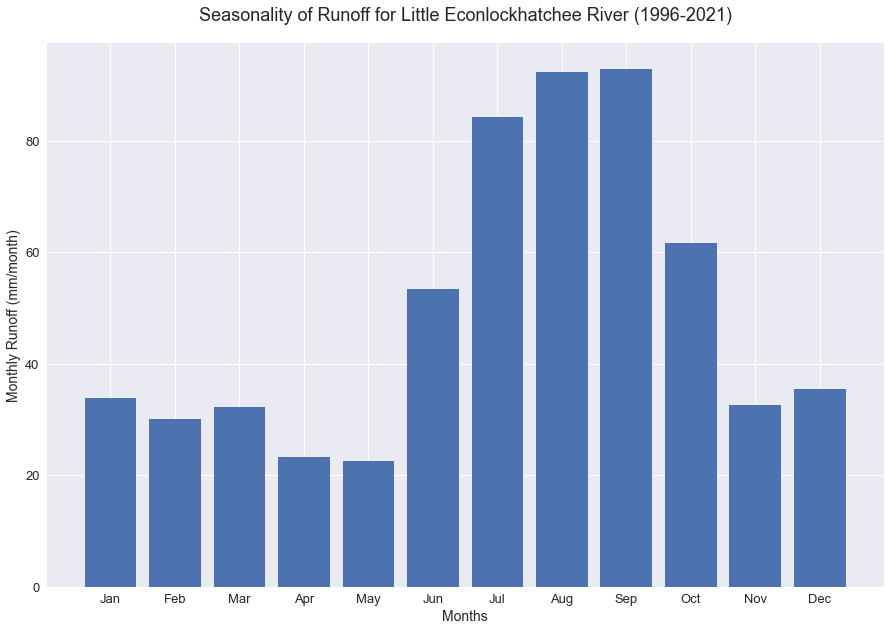

In [97]:
# plot the monthly runoff 
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.bar(runoff_monthly_avg.Months, runoff_monthly_avg['Monthly Runoff (mm/month)'])

plt.xlabel("Months", fontsize=14)
plt.ylabel("Monthly Runoff (mm/month)", fontsize=14)
plt.title("Seasonality of Runoff for Little Econlockhatchee River (1996-2021)", 
          fontsize=18, y=1.03)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
# plt.legend()
plt.savefig("Seasonality Runoff", dpi=300)
    
plt.show()    

### Plot FDC for runoff

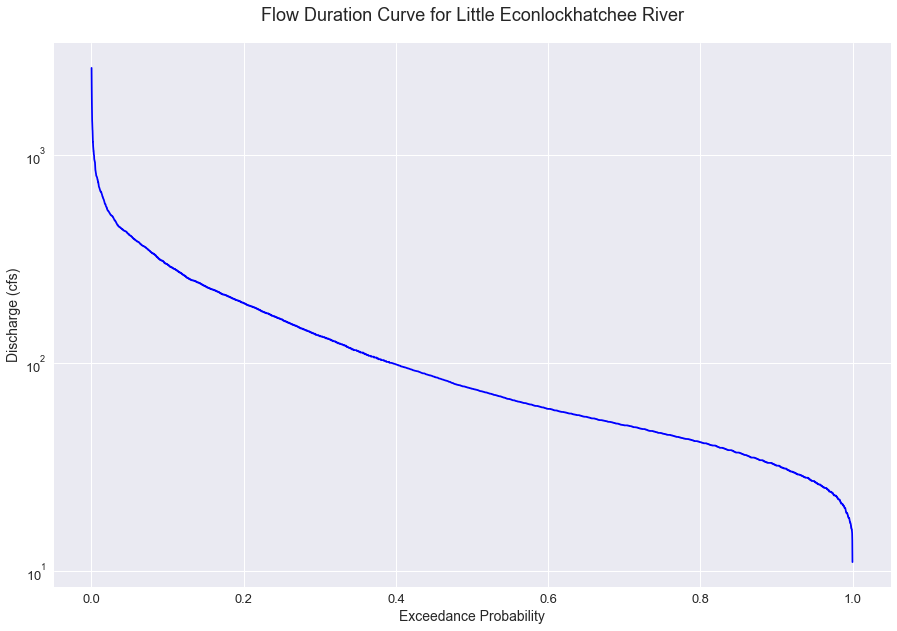

In [101]:
plt.style.use("seaborn")
plt.figure(figsize=(15, 10))
plt.plot(runoff_fdc['Exceedance prob'], runoff_fdc['discharge (cfs)'], color='b')
plt.xlabel("Exceedance Probability", fontsize=14)
plt.ylabel("Discharge (cfs)", fontsize=14)
plt.title("Flow Duration Curve for Little Econlockhatchee River", 
          fontsize=18, y=1.03)
plt.xticks(fontsize=13)
plt.yscale('log')
plt.yticks(fontsize=13)
plt.savefig("FDC", dpi=300)
    
plt.show()    